# **Assignment 3 ROB313 - Optimization**

In [3]:
# Import revelant libraries

import numpy as np
import matplotlib.pyplot as plt
from time import time
from data.data_utils import load_dataset
from scipy.linalg import cho_factor, cho_solve, svd
np.random.seed(21)

**Question 1 - Variants of Gradient Descent**

Observations:
- Range of good learning rates, too small results in no convergence, too large results in loss beginning small and becoming extremely large (asymptotic to inf, causes overflow errors)
- Increasing learning rate increases convergence rate
- Increased learning rate decreases epoch (no. of iterations until convergence condition is met)

c:\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\Ethan's PC\AppData\Local\Temp\ipykernel_8340\3404520272.py:64: RuntimeWarning: overflow encountered in square
  loss_hist[j,i] = np.mean(np.square(x_train[batch].dot(w)-y_train[batch]))


(1.0904753653424812, nan)

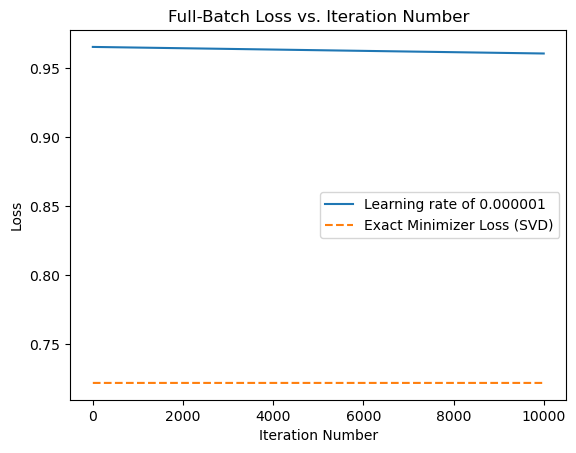

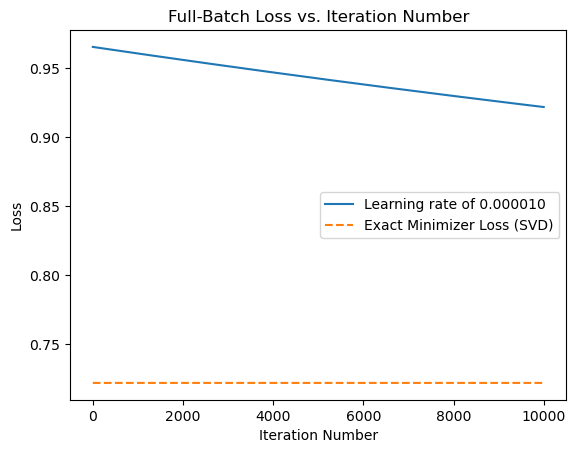

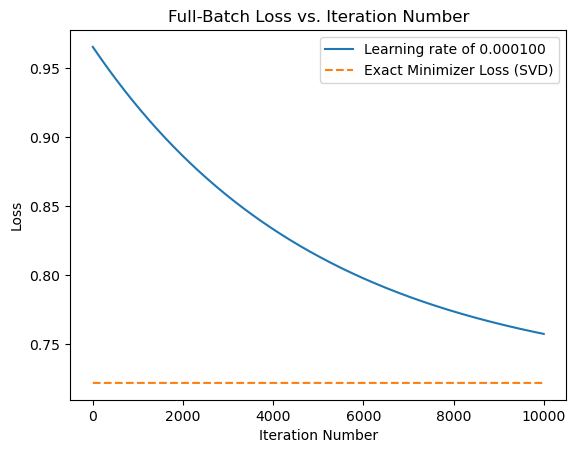

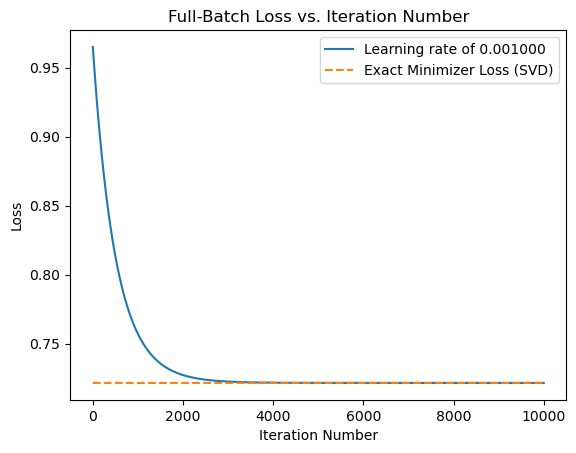

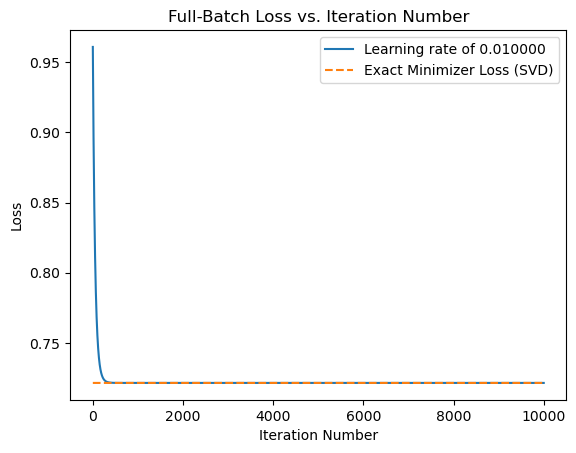

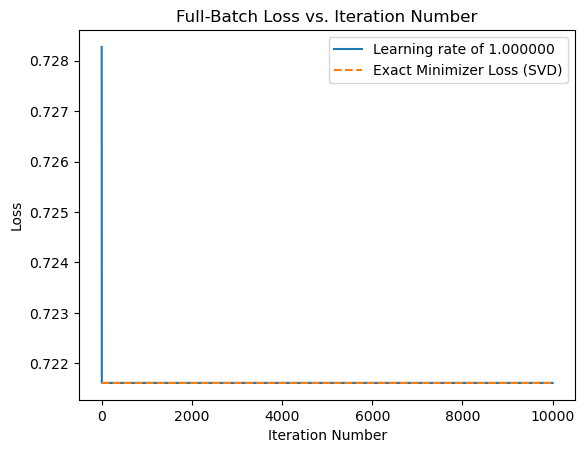

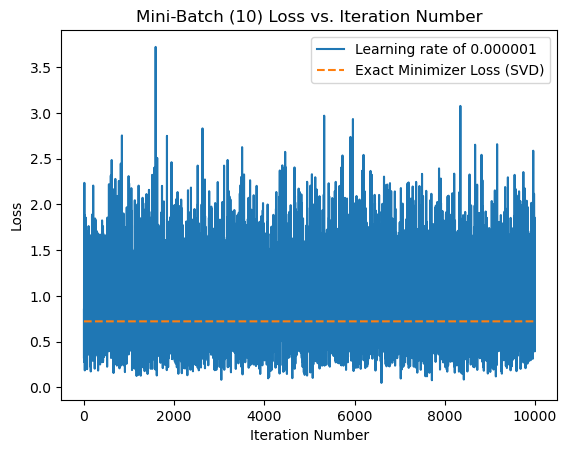

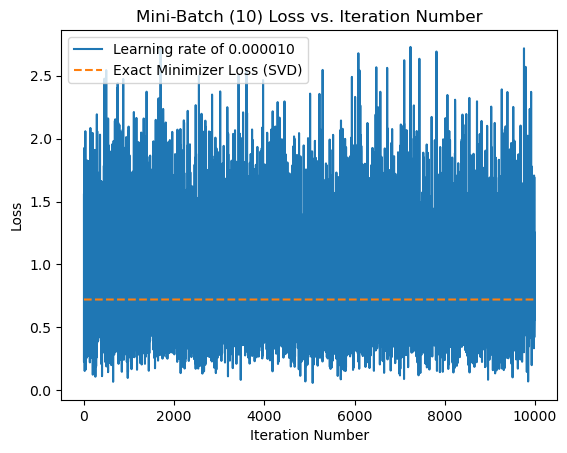

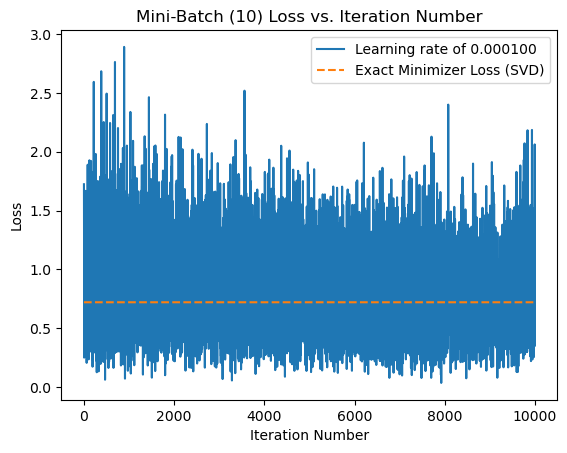

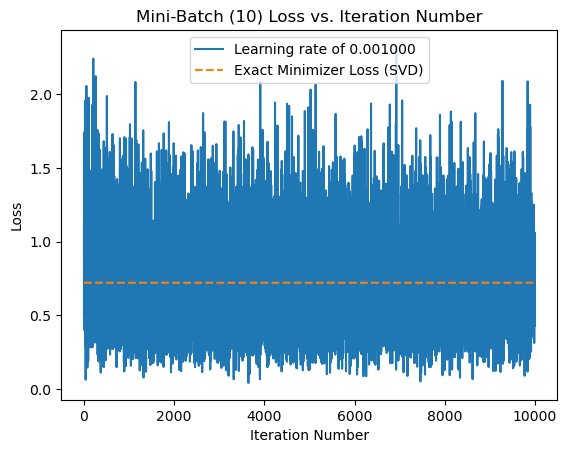

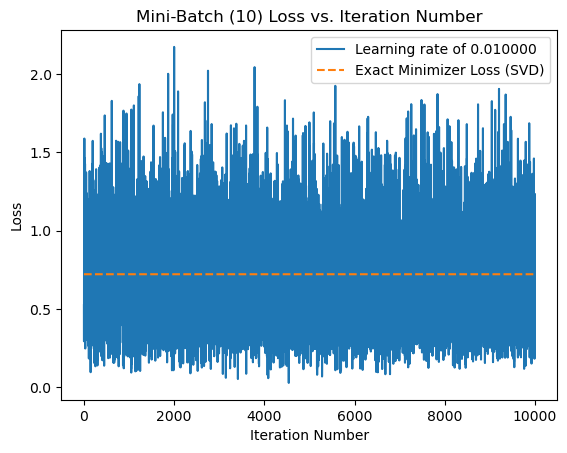

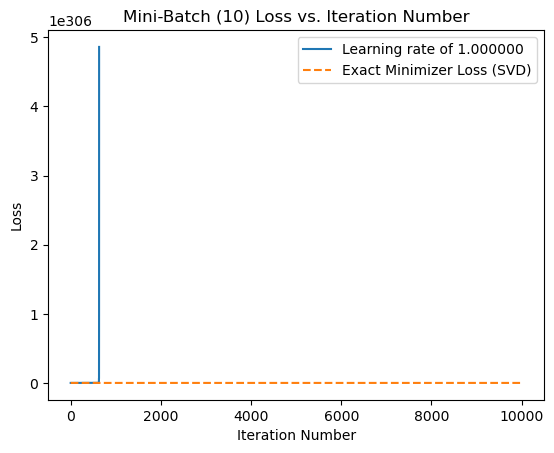

In [95]:
def fullbatchGD(x_train, y_train, x_test, y_test):
    '''Use objective function based on l2 loss and fhat = Xw'''
    eta_opts = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 1] # learning rates to test
    w_decision = np.zeros((x_train.shape[1], len(eta_opts))) 
    N = 10000 # iterations
    loss_hist = np.empty([N, len(eta_opts)])
    rmse = np.zeros((len(eta_opts),1))

    # Get optimal result using SVD to compare (as from A1)
    U,S,V = svd(x_train, full_matrices=False)
    opt_w = V.T.dot(U.T.dot(y_train)/(S.reshape(-1,1)))
    f_hat = x_train.dot(opt_w)
    optimal_loss = np.mean(np.square(f_hat - y_train))

    for i,eta in enumerate(eta_opts):
        # Iterate through different values of eta to compare results
        w = np.zeros((x_train.shape[1], 1)) # w is (D+1)x1
        for j in range(N):
            # Do N iterations of gradient descent
            gradients = (x_train.T.dot(x_train.dot(w)-y_train))/(x_train.shape[0])
            w = w - eta*gradients
            loss_hist[j,i] = np.mean(np.square(x_train.dot(w)-y_train))

            '''TODO: Add condition to check for convergence to optimal and record time to reach it'''
        
        w_decision[:,i] = w.reshape(-1,)
        rmse[i] = np.sqrt(np.mean(np.square(x_train.dot(w)-y_train)))
        # Plot iteration vs. loss
        iterations = np.arange(0,N)
        plt.figure()
        plt.title('Full-Batch Loss vs. Iteration Number')
        plt.plot(iterations, loss_hist[:,i], label='Learning rate of %f' % eta)
        plt.plot(iterations, np.full((N,1), optimal_loss), label='Exact Minimizer Loss (SVD)', ls='--')
        plt.xlabel('Iteration Number')
        plt.ylabel('Loss')
        plt.legend(loc=0)
    
    min_ind = np.unravel_index(np.argmin(rmse, axis=None), rmse.shape)
    best_w = w_decision[:, min_ind[0]]
    test_rmse = np.sqrt(np.mean(np.square(x_test.dot(best_w) - y_test)))
    
    return test_rmse
    
def stochasticGD(x_train, y_train, x_test, y_test, b):
    '''Batch based version of GD for time complexity improvements'''
    eta_opts = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 1] # learning rates to test
    w_decision = np.zeros((x_train.shape[1], len(eta_opts))) 
    N = 10000 # iterations
    loss_hist = np.empty([N, len(eta_opts)])
    rmse = np.zeros((len(eta_opts),1))

    # Get optimal result using SVD to compare (as from A1)
    U,S,V = svd(x_train, full_matrices=False)
    opt_w = V.T.dot(U.T.dot(y_train)/(S.reshape(-1,1)))
    f_hat = x_train.dot(opt_w)
    optimal_loss = np.mean(np.square(f_hat - y_train))

    for i,eta in enumerate(eta_opts):
        # Iterate through different values of eta to compare results
        w = np.zeros((x_train.shape[1], 1)) # w is (D+1)x1
        for j in range(N):
            # Do N iterations of gradient descent with b sized batches per iteration
            batch = np.random.choice(x_train.shape[0], b)
            gradients = (x_train[batch].T.dot(x_train[batch].dot(w)-y_train[batch]))/(x_train[batch].shape[0])
            w = w - eta*gradients
            loss_hist[j,i] = np.mean(np.square(x_train[batch].dot(w)-y_train[batch]))
        
        w_decision[:,i] = w.reshape(-1,)
        rmse[i] = np.sqrt(np.mean(np.square(x_train[batch].dot(w)-y_train[batch])))
        # Plot iteration vs. loss
        iterations = np.arange(0,N)
        plt.figure()
        plt.title('Mini-Batch (%d) Loss vs. Iteration Number' % b)
        plt.plot(iterations, loss_hist[:,i], label='Learning rate of %f' % eta)
        plt.plot(iterations, np.full((N,1), optimal_loss), label='Exact Minimizer Loss (SVD)', ls='--')
        plt.xlabel('Iteration Number')
        plt.ylabel('Loss')
        plt.legend(loc=0)
    
    min_ind = np.unravel_index(np.argmin(rmse, axis=None), rmse.shape)
    best_w = w_decision[:, min_ind[0]]
    test_rmse = np.sqrt(np.mean(np.square(x_test.dot(best_w) - y_test)))
    
    return test_rmse
    
def runQ1(mini_batch):
    x_train, x_valid, x_test, y_train, y_valid, y_test = load_dataset('pumadyn32nm')
    # Use only first 1000 points in training set for predictions
    x_train, y_train = x_train[:1000], y_train[:1000]
    # Add bias feature of 1s to form fhat = Xw
    x_train = np.hstack((np.ones((x_train.shape[0],1)), x_train))
    x_test = np.hstack((np.ones((x_test.shape[0],1)), x_test))

    # Full batch run
    fullbatch_rmse = fullbatchGD(x_train, y_train, x_test, y_test)
    minibatch_rmse = stochasticGD(x_train, y_train, x_test, y_test, mini_batch)

    return fullbatch_rmse, minibatch_rmse

runQ1(1)